# Random Forest Model

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn import ensemble as en
from sklearn import model_selection as ms
from sklearn import metrics as mt

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
# Dados Treinamento
X_train = pd.read_csv("/home/ds_deivisson/repos/datasets/X_training_classificacao.csv")
y_train = pd.read_csv("/home/ds_deivisson/repos/datasets/y_training_classificacao.csv")

# Dados Validacao
X_val = pd.read_csv("/home/ds_deivisson/repos/datasets/X_validation_classificacao.csv")
y_val = pd.read_csv("/home/ds_deivisson/repos/datasets/y_validation_classificacao.csv")


# Dados Teste
X_test = pd.read_csv("/home/ds_deivisson/repos/datasets/X_test_classificacao.csv")
y_test = pd.read_csv("/home/ds_deivisson/repos/datasets/y_test_classificacao.csv")

# Contagem
linhas = len(y_train) + len(y_val) + len(y_test)

treino_perc = len(y_train)/linhas*100
validacao_perc = len(y_val)/linhas*100
teste_perc = len(y_test)/linhas*100

print (f" Percentual Treino: {treino_perc:.2f}")
print (f" Percentual Validacao: {validacao_perc:.2f}")
print (f" Percentual Teste: {teste_perc:.2f}")

 Percentual Treino: 56.00
 Percentual Validacao: 24.00
 Percentual Teste: 20.00


## Features/ Label

In [3]:
y_train_class = y_train.iloc[:, 0].to_numpy()
y_val_class = y_val.iloc[:, 0].to_numpy()
y_test_class = y_test.iloc[:, 0].to_numpy()

## Random Forest Model - Dados Treino e otimização hiperparametros

In [4]:
# Definindo o Espaço de Busca (Distribuições)
param_dist = {
    'n_estimators': [100, 200, 500],              # Quantidade de árvores
    'max_depth': [10, 20, 30, None],              # Profundidade
    'min_samples_leaf': [2, 10, 50],              # Estabilidade nas folhas
    'max_features': ['sqrt', 'log2', 0.5],        # Diversidade de colunas
    'class_weight': ['balanced', 'balanced_subsample', None] # Lida com desbalanceamento
}

In [ ]:
# Configurando o Modelo e a Busca Aleatória
rf = en.RandomForestClassifier(random_state=42)

# modelo com hiperparâmetros
random_search = ms.RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    scoring='f1',       
    n_jobs=-1,          
    verbose=2, 
    random_state=42
)

In [ ]:
# Executando a Otimização
print("Iniciando a busca pelos melhores parâmetros...")
random_search.fit(X_train, y_train_class)

Iniciando a busca pelos melhores parâmetros...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=0.5, min_samples_leaf=50, n_estimators=100; total time=  16.3s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=0.5, min_samples_leaf=50, n_estimators=100; total time=  16.6s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=0.5, min_samples_leaf=50, n_estimators=100; total time=  16.7s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   8.9s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   8.9s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   9.0s
[CV] END class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, n_est

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'class_weight': ['balanced', 'balanced_subsample', ...], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [2, 10, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strate

In [ ]:
# Avaliação do modelo com dados de treino
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_train)
y_proba = best_rf.predict_proba(X_train)[:, 1]

print(f"\nMelhores Parâmetros Encontrados: {random_search.best_params_}")
print("\n--- Relatório de Métricas ---")
print(mt.classification_report(y_train, y_pred))
print(f"ROC-AUC Score: {mt.roc_auc_score(y_train, y_proba):.4f}")


Melhores Parâmetros Encontrados: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 30, 'class_weight': 'balanced_subsample'}

--- Relatório de Métricas ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41087
           1       1.00      1.00      1.00     31428

    accuracy                           1.00     72515
   macro avg       1.00      1.00      1.00     72515
weighted avg       1.00      1.00      1.00     72515

ROC-AUC Score: 1.0000


## Random Forest Model - Dados Validação

In [ ]:
# Avaliação modelo com dados de validação
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_val)
y_proba = best_rf.predict_proba(X_val)[:, 1]

print(f"\nMelhores Parâmetros Encontrados: {random_search.best_params_}")
print("\n--- Relatório de Métricas ---")
print(mt.classification_report(y_val, y_pred))
print(f"ROC-AUC Score: {mt.roc_auc_score(y_val, y_proba):.4f}")


Melhores Parâmetros Encontrados: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 30, 'class_weight': 'balanced_subsample'}

--- Relatório de Métricas ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17610
           1       0.97      0.95      0.96     13469

    accuracy                           0.96     31079
   macro avg       0.97      0.96      0.96     31079
weighted avg       0.97      0.96      0.96     31079

ROC-AUC Score: 0.9948


## Random Forest Model - Dados Teste

In [ ]:
# concatenacao dos dados treino e validação
X_train_full = np.vstack([X_train, X_val])
y_train_full = np.hstack([y_train_class, y_val_class])

# Predição do modelo com dados de teste e métricas
y_test_pred = best_rf.predict(X_test)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

test_f1 = mt.f1_score(y_test_class, y_test_pred)

print(f"--- PERFORMANCE FINAL (TESTE) ---")
print(f"F1-Score no Teste: {test_f1:.4f}")
print(f"Accuracy: {mt.accuracy_score(y_test_class, y_test_pred):.4f}")
print(f"Precision: {mt.precision_score(y_test_class, y_test_pred):.4f}")
print(f"Recall: {mt.recall_score(y_test_class, y_test_pred):.4f}")
print(f"ROC-AUC Score: {mt.roc_auc_score(y_test_class, y_test_proba):.4f}")

--- PERFORMANCE FINAL (TESTE) ---
F1-Score no Teste: 0.9588
Accuracy: 0.9642
Precision: 0.9698
Recall: 0.9480
ROC-AUC Score: 0.9948


/tmp/ipykernel_13425/220149559.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15), palette='viridis')


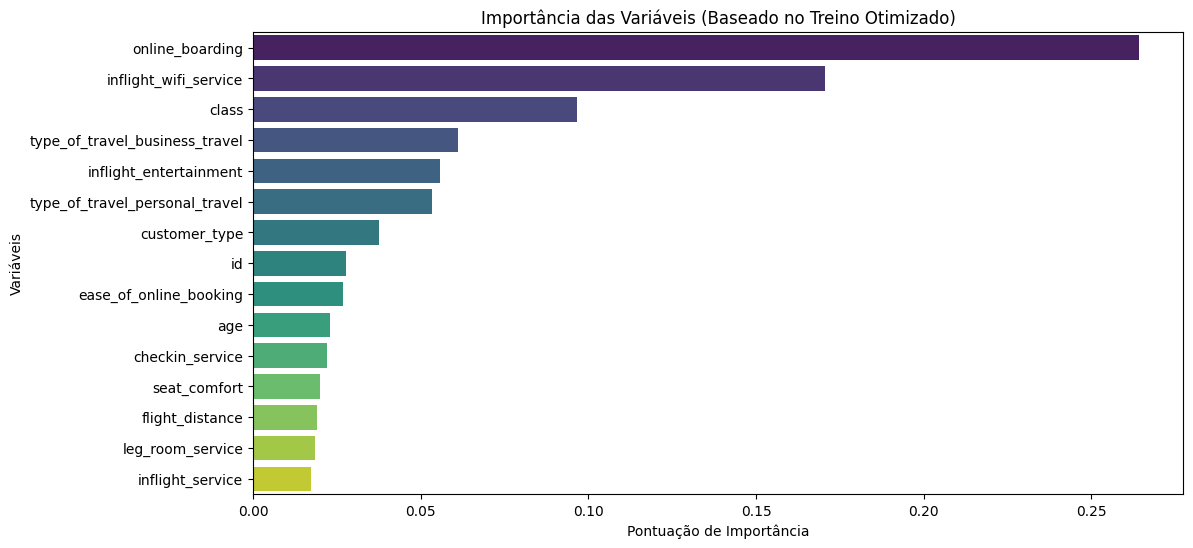

As 5 variáveis mais decisivas para o modelo:
                           Feature  Importance
10                 online_boarding    0.264120
5            inflight_wifi_service    0.170439
3                            class    0.096591
23  type_of_travel_business_travel    0.061232
12          inflight_entertainment    0.055625


In [ ]:
# importancia do melhor modelo
importances = best_rf.feature_importances_

# Pega os nomes REAIS das colunas
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature {i}" for i in range(len(importances))]

# Criar o DataFrame de importância
feature_imp_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(15), palette='viridis')
plt.title(f'Importância das Variáveis (Baseado no Treino Otimizado)')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Variáveis')
plt.show()

# Variáveis mais decisivas:
print("As 5 variáveis mais decisivas para o modelo:")
print(feature_imp_df.head(5))